<a href="https://colab.research.google.com/github/RomaZhm/ColabNotes/blob/main/ode_ivp_razhmurin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Roman Zhmurin"
COLLABORATORS = "razhmurin@edu.hse.ru"

---

# Задача Коши для ОДУ

# I. Метод Эйлера для ОДУ первого порядка.

Рассмотрим уравнение первого порядка

$$
\frac{d u}{d t} = \lambda u
$$

С начальным условием $u(t=0) = u_0$.


### I.I. Явный метод Эйлера.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи явного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

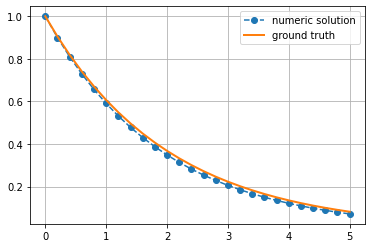

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Теперь попробуем задать значение шага $\tau$ (в коде это `dt`) такое, что $|\lambda| \tau > 1$.

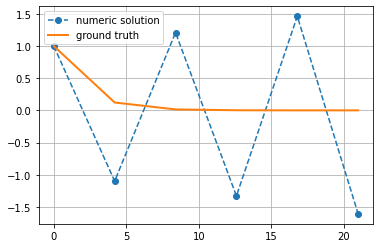

In [ ]:
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=12/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### I.II Неявный метод Эйлера.

Напишите функцию решения того же самого уравнения $du/dt = \lambda u$ используя неявную схему Эйлера. Постройте решение для нескольких значений шага интегрирования, обсудите поведение решения при $\lambda\tau > 2$.

In [ ]:
def implicit_euler_solve(lam, u0, T, dt):
    """Решает $du/dt = \lambda u$ на $0 < t < T$ с $u(t=0) = u0$ при помощи неявного метода Эйлера."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k]/(1 - lam * dt)
    return tt, y

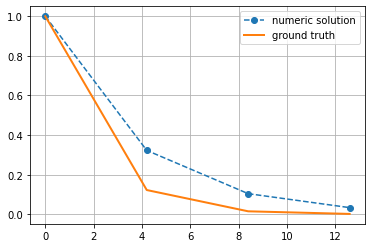

In [ ]:
# Plot your solution. Vary the step size, discuss the behavior of the solution for $\lambda\tau > 2$. 

lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

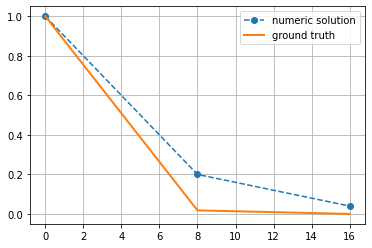

In [ ]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=4/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

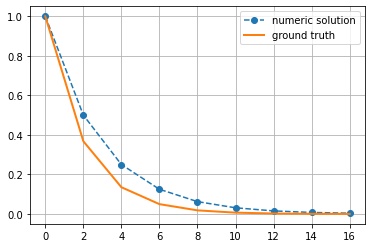

In [ ]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

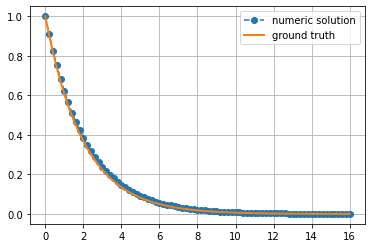

In [ ]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=0.1/abs(lam))
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

Для $\lambda\tau > 2$ решение не "скачет"(в отличии от явного метода Эйлера), а только недостаточно приближается к нему

In [ ]:
lam = -0.5
tt, y = implicit_euler_solve(lam, u0=1.0, T=8/abs(lam), dt=2.1/abs(lam))

assert (y > 0).all()


## II. Системы линейных уравнений

Рассмотрим систему двух уравнений первого порядка.

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

где $\mathbf{u}$ есть вектор длины 2, $A = \mathrm{const}$ - заданная матрица 2$\times$2.

Выполните обобщение алгоритма `euler_solve` для решения систем линейных уравнений первого порядка с матрицей $A$, не зависящей от времени, используя явную схему Эйлера.

In [ ]:
def euler_solve2(a, u0, T, dt):
    """Solve the system du/dt = Au via an explicit Euler scheme.
    
    Parameters
    ----------
    a : ndarray, shape(ndim, ndim)
        The matrix of the l.h.s.
    u0 : ndarray, shape(ndim,)
        Initial condition
    T : float
        construct the solution for $t\in [0, T)$
    dt : float
        Integration step size $\tau$
        
    Returns
    -------
    t : ndarray, shape (n,)
        Integration times
    y : ndarray, shape (n, ndim)
        Solution of the FD system. 
        y[k, :] is the solution at t[k].
    """
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps+1, ndim))
    y[0, :] = u0
    for k in range(num_steps):
        for i in range(ndim):
            y[k + 1, i] = y[k, i] + dt*(a[i, :] @ y[k, :])
    return tt, y

Напишите функцию, возвращающую решение задачи Коши для системы уравнений $du/dt = A u$ с постоянной матрицей $A$ через матричную экспоненту. (Используйте библиотечную функцию `scipy.linalg.expm`)

In [ ]:
from scipy.linalg import expm

def mat_exp_solve(a, u0, tt):
    """Construct the solution of $du/dt = A u$ with $u(t=0) = u_0$ at times `tt`.
    
    Parameters
    ----------
    a : ndarray, shape (ndim, ndim)
    
    u0 : ndarray, shape (ndim,)
    
    tt : ndarray, shape (n,)
        The values of $t$
        
    Return
    ------
    u : ndarray, shape (n, ndim)
        u[:, k] is $\exp(t[k] A)$
    """
    num_steps = len(tt)
    ndim = a.shape[0]
    u = np.empty((num_steps, ndim))
    for k in range(num_steps):
        u[k, :] = expm(tt[k] * a) @ u0
    return u

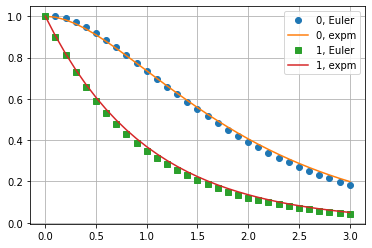

In [ ]:
# Solve via Euler's method, compare to the matrix exponential

from scipy.linalg import expm

a = np.array([[-1, 1],
              [0, -1]], dtype=float)
t, y  = euler_solve2(a, u0=[1, 1], T=3, dt=0.1)
ym = mat_exp_solve(a, [1, 1], t)

plt.plot(t, y[:, 0], 'o', label='0, Euler')
plt.plot(t, ym[:, 0], '-', label='0, expm')

plt.plot(t, y[:, 1], 's', label='1, Euler')
plt.plot(t, ym[:, 1], '-', label='1, expm')

plt.legend(loc='best')
plt.grid(True)

In [ ]:
# This cell is a test to compare your Euler method solution to the matrix exponential

a = np.array([[-1, 1],
              [0, -1]], dtype=float)


## II.2 Жесткие системы

Рассмотрим линейную систему, $du/dt = Au$, с матрицей правой части 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

с начальным условием $u = (1, 0)^T$.

Найдите собственные значения матрицы $A$ (используя `np.linalg.eigvals`) и прокомментируйте, является ли система жесткой.

(2 балла)

In [ ]:
A = np.array([[-10, 10],
             [32, -499]])
print(np.linalg.eigvals(A))

[  -9.34647667 -499.65352333]


Система является жесткой

Постройте графики решения системы на интервале $0 < t < 1$ с начальным условием $u = (1, 0)^T$ используя функции `euler_solve2` и `mat_exp_solve`. Используйте несколько значений шага, например $\tau = 4\cdot 10^{-3}$ и $\tau = 4.5\cdot 10^{-3}$. Прокомментируйте поведение решений.

(3 балла)
 

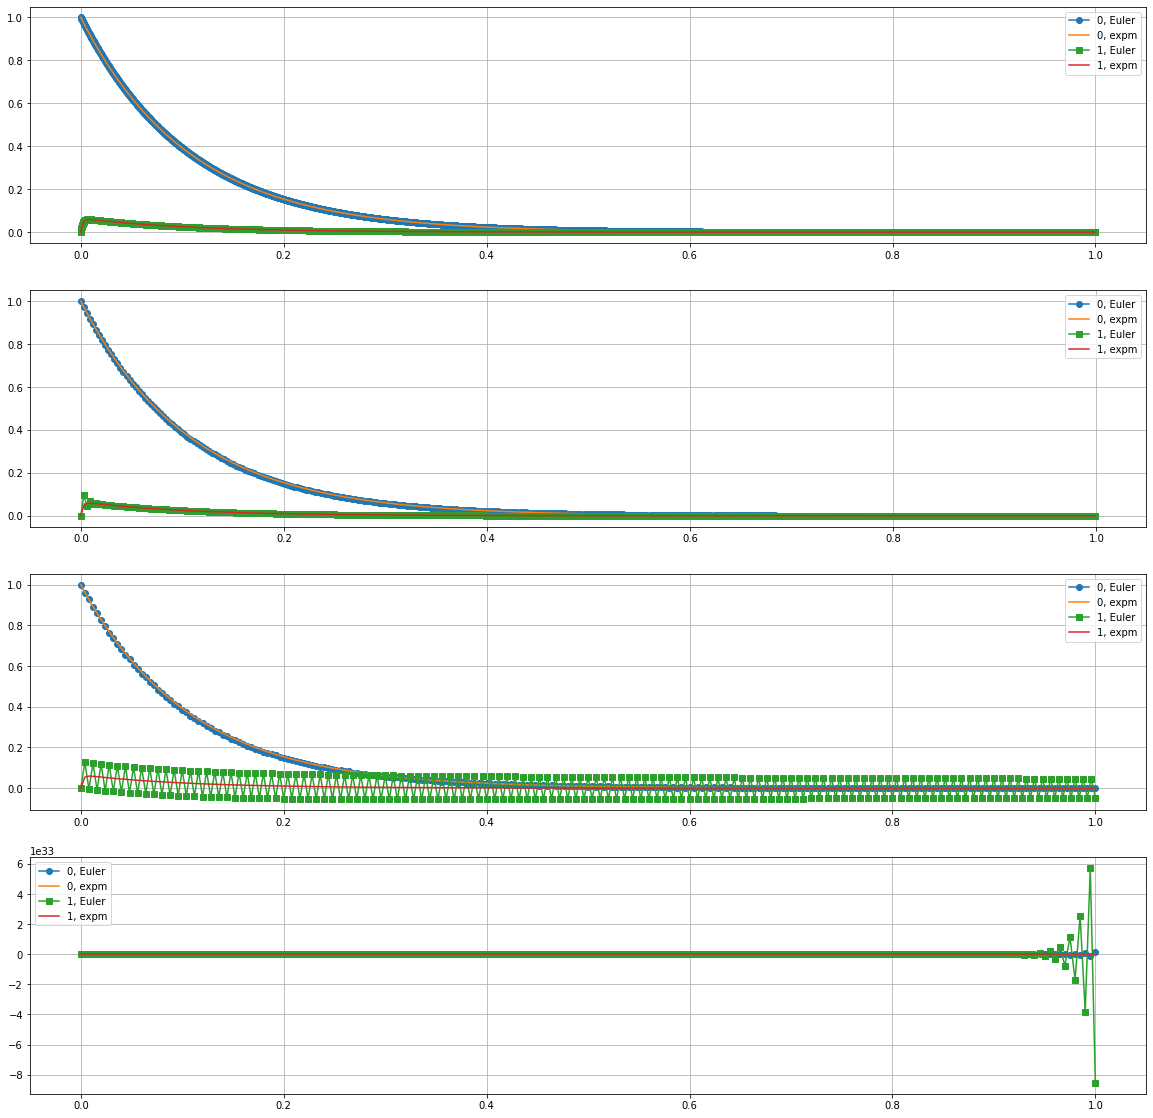

In [ ]:
taus = [3e-4, 3e-3, 4e-3, 5e-3]
fig, axs = plt.subplots(len(taus), figsize = (20, 20))
i = 0
for tau in taus:
    t, y  = euler_solve2(A, u0=[1, 0], T=1, dt = tau)
    ym = mat_exp_solve(A, [1, 0], t)

    axs[i].plot(t, y[:, 0], 'o-', label='0, Euler')
    axs[i].plot(t, ym[:, 0], '-', label='0, expm')

    axs[i].plot(t, y[:, 1], 's-', label='1, Euler')
    axs[i].plot(t, ym[:, 1], '-', label='1, expm')

    axs[i].legend(loc='best')
    axs[i].grid(True)
    i += 1

Для $\tau > 3\cdot 10^{-3}$ решение начинает сначала умеренно, а потом очень сильно отклоняться от решения в разные направления.

## Неявный метод Эйлера II.3

Реализуйте $\textit{неявную}$ схему Эйлера для системы линейных уравнений первого порядка с постоянными коэффициентами. Заметьте, что на каждом шаге вам необходимо решать систему линйных алгебраических уравнений (используйте `np.linalg.solve`).

Примените Вашу реализацию для уравнения из пункта II.2. Прокомментируйте результаты.
(5 баллов)

In [ ]:
def implicit_euler_solve2(a, u0, T, dt):
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps+1, ndim))
    y[0, :] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve((np.eye(ndim)-dt*a), y[k])
    return tt, y

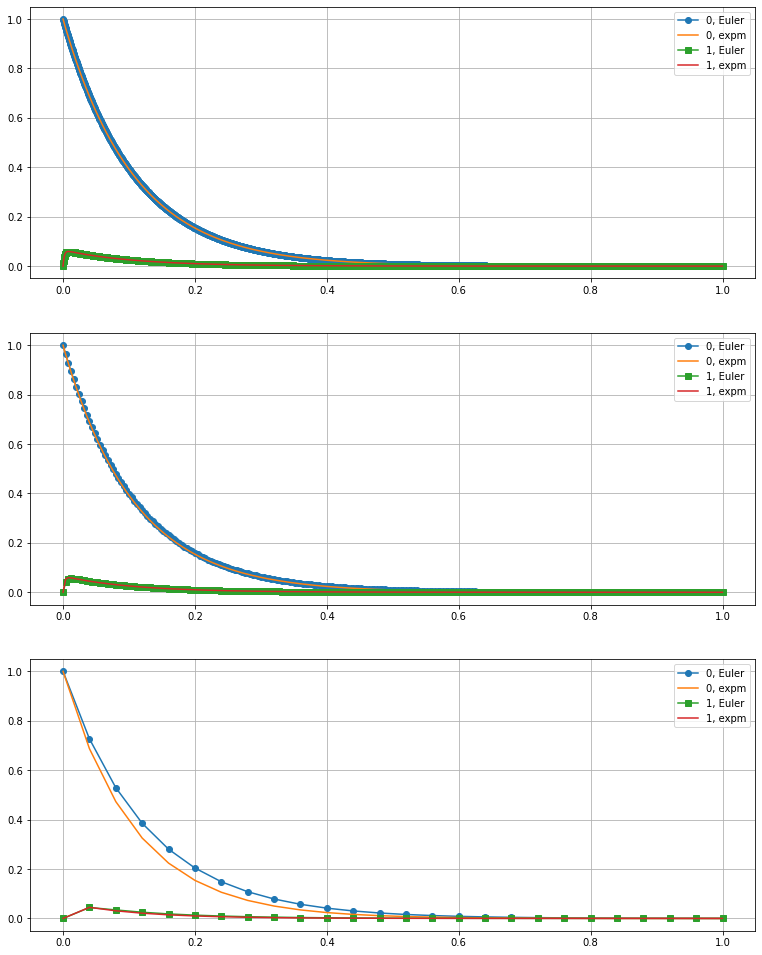

In [ ]:
taus = [4e-4, 4e-3, 4e-2]
fig, axs = plt.subplots(len(taus), figsize = (13, 17))
i = 0
for tau in taus:
    t, y  = implicit_euler_solve2(A, u0=[1, 0], T=1, dt = tau)
    ym = mat_exp_solve(A, [1, 0], t)

    axs[i].plot(t, y[:, 0], 'o-', label='0, Euler')
    axs[i].plot(t, ym[:, 0], '-', label='0, expm')

    axs[i].plot(t, y[:, 1], 's-', label='1, Euler')
    axs[i].plot(t, ym[:, 1], '-', label='1, expm')

    axs[i].legend(loc='best')
    axs[i].grid(True)
    i += 1

Неявный метод Эйлера хорошо приближается к необходимому решению, к тому же без сильных отклонений независимо от размера $\tau$

# III. ОДУ второго порядка.

Рассмотрим ОДУ второго порядка, описывающее осцилляции маятника

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Преобразуйте данное уравнение второго порядка в систему ОДУ первого порядка.

### Тест III.1 

Решите данную систему уравнений, используя явную  схему Эйлера на интервале времении не менее десяти периодов осцилляций. 

Мы знаем, что в отсутствии трения выполняется закон сохранения энергии:

$$
E = \frac{(du/dt)^2}{2} + \frac{\omega^2 u^2}{2}
$$

Постройте зависимость $E$ от времени для вашего численного решения. Используйте несколько значений шага. Выполняется ли закон сохранения энергии?

(5 баллов)

In [ ]:
def first_order_ode(omega):
    return np.array([[0, 1], 
                    [-omega**2, 0]])

def energy(u, du, omega):
    return du**2/2 + omega**2*u**2/2

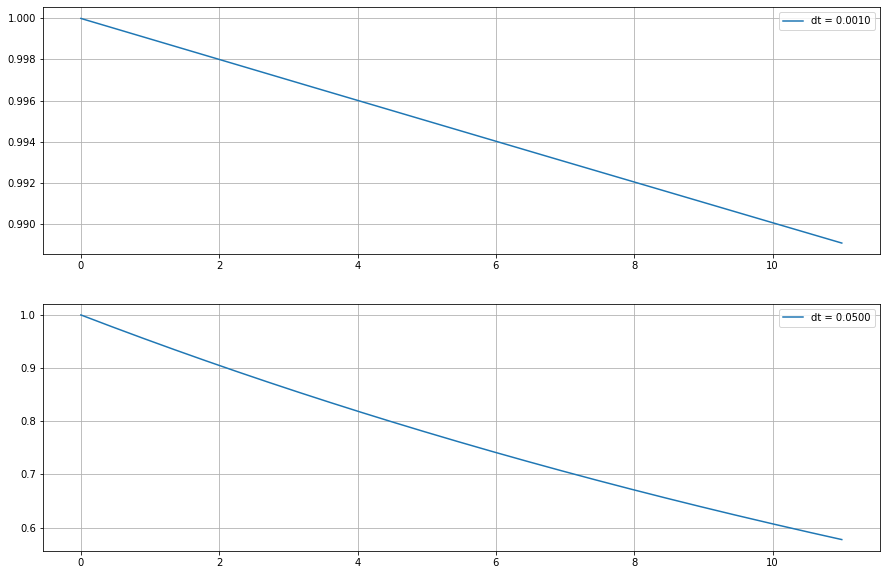

In [ ]:
omega = 1
A = first_order_ode(omega)

fig, axs = plt.subplots(2, figsize = (15, 10))
i = 0
for tau in [1e-3, 5e-2]:
    tt, y = implicit_euler_solve2(A, u0 = [1, 1], T = 11, dt = tau)

    E = energy(y[:, 0], y[:, 1], omega)

    axs[i].plot(tt, E, label='dt = %.4f' % tau)
    axs[i].legend(loc='best')
    axs[i].grid()
    i += 1

Закон выполняется но на каждом шаге энергия изменяется на $\approx \frac{10dt}{n}$ $n$ - количество шагов

### Тест III.2

Реализуйте схему Рунге-Кутта второго порядка. Используте ее для решения того же уравнения с теми же значениями шага $\tau$. Сравните решения, полученные методом Рунге-Кутта и методом Эйлера на одинаковых промежутках времени. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

In [ ]:
def RK(a, u0, T, dt):
    a = np.asarray(a, dtype=float)
    u0 = np.asarray(u0, dtype=float)
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    ndim = a.shape[0]
    y = np.zeros((num_steps+1, ndim))
    y[0, :] = u0
    for k in range(num_steps):
        k_1 = a @ y[k]
        k_2 = a @ (y[k] + dt / 2 * k_1)
        y[k+1] = y[k] + dt * k_2 
    return tt, y

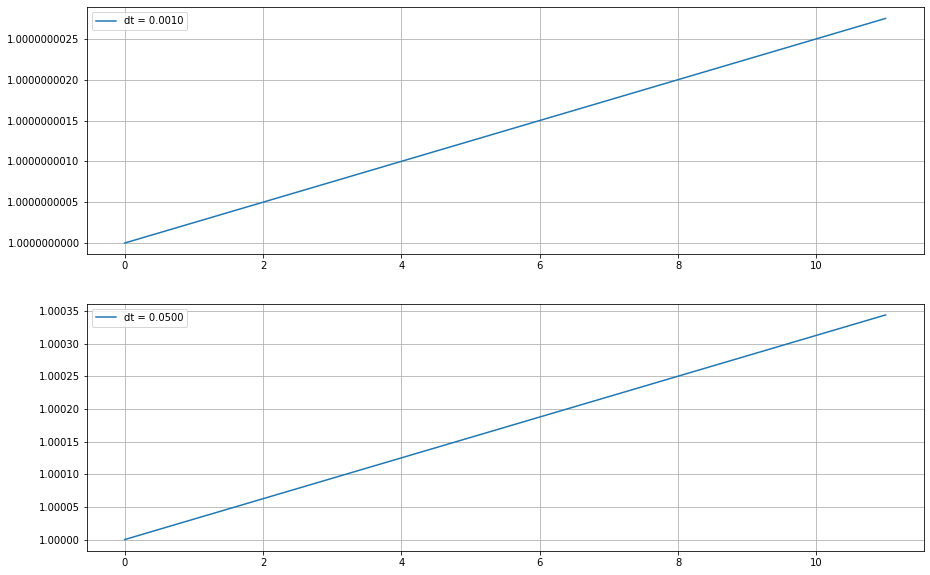

In [ ]:
omega = 1
A = first_order_ode(omega)

fig, axs = plt.subplots(2, figsize = (15, 10))
i = 0
for tau in [1e-3, 5e-2]:
    tt, y = RK(A, u0 = [1, 1], T = 11, dt = tau)

    E = energy(y[:, 0], y[:, 1], omega)

    axs[i].plot(tt, E, label='dt = %.4f' % tau)
    axs[i].legend(loc='best')
    axs[i].ticklabel_format(useOffset = False)
    axs[i].grid()
    i += 1

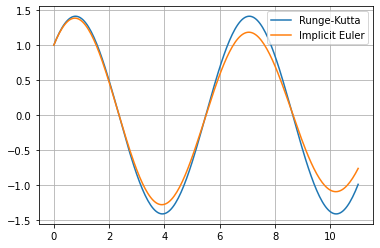

In [ ]:
omega = 1
A = first_order_ode(omega)

tt1, y1 = RK(A, u0 = [1, 1], T = 11, dt = 5e-2)
tt2, y2 = implicit_euler_solve2(A, u0 = [1, 1], T = 11, dt = 5e-2)

plt.plot(tt1, y1[:, 0], label='Runge-Kutta')
plt.plot(tt2, y2[:, 0], label='Implicit Euler')
plt.legend(loc='best')
plt.grid()

Для схемы Рунге-Кутта то на сколько отклоняется энергия намного меньше, а само решение приближается быстрее, чем неявная схема Эйлера

### Тест III.3

Используте для решения того же уравнения библиотечную функцию `scipy.intergrate_solve_ivp`.
Сравните результаты с решениями, полученными методомами Рунге-Кутта и Эйлера. Проверьте закон сохранения энергии. Обсудите.

(5 баллов)

In [ ]:
def system_osc(t, y, omega = 1):
    return np.array([[0, 1], 
                    [-omega**2, 0]]) @ y

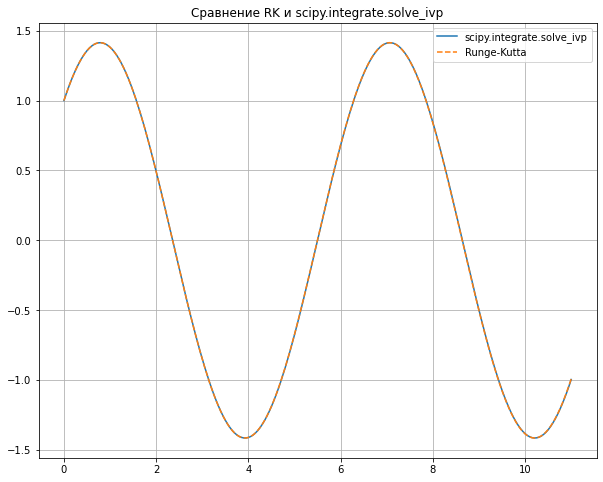

In [ ]:
from scipy.integrate import solve_ivp

sol = solve_ivp(system_osc, [0, 11], [1, 1], max_step = 5e-2)

plt.figure(figsize = (10, 8) )
plt.plot(sol.t, sol.y[0, :], '-', label='scipy.integrate.solve_ivp')
plt.plot(tt1, y1[:, 0], '--', label='Runge-Kutta')
plt.legend(loc='best')
plt.title('Сравнение RK и scipy.integrate.solve_ivp')
plt.grid()

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.]


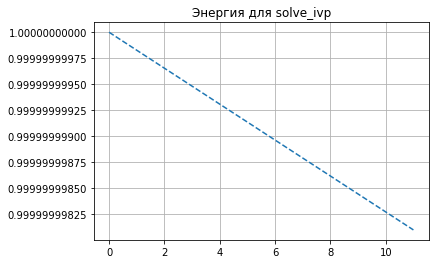

In [ ]:
E = energy(sol.y[0, :], sol.y[1, :], 1)
print(E)

plt.plot(sol.t, E , '--')
ax = plt.gca()
ax.ticklabel_format(useOffset = False)
plt.title('Энергия для solve_ivp')
plt.grid()

Схема Рунге-Кутта приближает решение так же хорошо, как и библиотечная функция, а энергия остается постоянной